# Team Name: **Analytics Acrobats**

### Submission: **1**

## Setup

In [40]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Set seed to ensure reproducibility

seed = 2024
np.random.seed(seed)

In [42]:
# Load datasets

diet = pd.read_csv('diet.csv')
requests = pd.read_csv('requests.csv')
reviews = pd.read_csv('reviews.csv')
recipes = pd.read_csv('recipes.csv')

/var/folders/_4/9t_lhqh15ps7xbdf5qrr2sg40000gn/T/ipykernel_72760/3826872962.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  reviews = pd.read_csv('reviews.csv')


## Data Understanding & Cleaning

### diet.csv

#### Overview

In [43]:
# Get overview of the diet dataset

print(diet.head())
print(diet.info())
print(diet.isnull().sum())

# --> One missing value in "Diet" column

    AuthorId        Diet  Age
0  10000120E  Vegetarian   46
1   1000014D       Vegan   18
2   1000015A  Vegetarian   58
3   1000016E  Vegetarian   32
4   1000027E       Vegan   61
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   AuthorId  271907 non-null  object
 1   Diet      271906 non-null  object
 2   Age       271907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.2+ MB
None
AuthorId    0
Diet        1
Age         0
dtype: int64


                 Age
count  271907.000000
mean       48.503727
std        17.898130
min        18.000000
25%        33.000000
50%        48.000000
75%        64.000000
max        79.000000
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


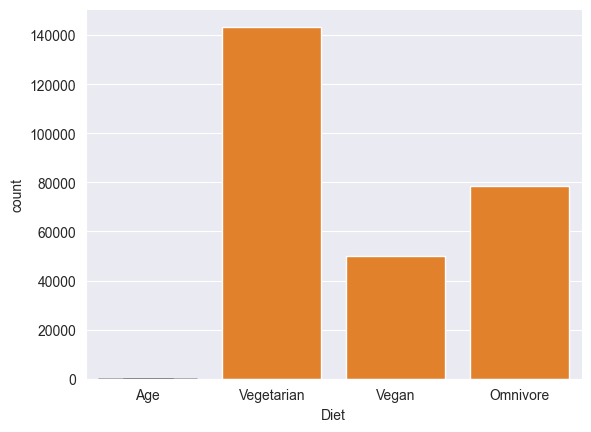

In [44]:
# Descriptives for diet dataset

print(diet.describe())

# boxplot for age
print(sns.boxplot(diet));

# barplot for diet

print(sns.countplot(x='Diet', data=diet));

In [45]:
# Show rows with missing values in diet dataset

print(diet[diet.isnull().any(axis=1)])

# what does this user do in the other tables? -> user has no requests or reviews

       AuthorId Diet  Age
242181  646062A  NaN   63


#### Handle Missing Values

In [46]:
# Since there is only one row, drop rows with missing values in diet dataset

diet = diet.dropna()

#### Fix data types

In [47]:
# Make column "Diet" of type category

diet['Diet'] = diet['Diet'].astype('category')

#### Convert categorical to numeric

In [48]:
# Use dummy variable encoding for "Diet" column

diet = pd.get_dummies(diet, columns=['Diet'], drop_first=True)

In [49]:
diet

,AuthorId,Age,Diet_Vegan,Diet_Vegetarian
0,10000120E,46,False,True
1,1000014D,18,True,False
2,1000015A,58,False,True
3,1000016E,32,False,True
4,1000027E,61,True,False
...,...,...,...,...
271902,999917E,28,False,True
271903,999936C,22,False,False
271904,99993D,58,False,True
271905,99994A,18,False,True


### recipes.csv

#### Overview

In [50]:
# Get overview of the recipes dataset

print(recipes.head())
print(recipes.info())
print(recipes.isnull().sum())

# --> Missing values in columns "RecipeServings" and "RecipeYield"

   RecipeId                                      Name  CookTime  PrepTime  \
0     73440              Bow Ties With Broccoli Pesto         0      1800   
1    365718                       Cashew-chutney Rice      3600       600   
2    141757  Copycat Taco Bell Nacho Fries BellGrande      3600      2700   
3    280351  Slow Cooker Jalapeno Cheddar Cheese Soup     18000      1800   
4    180505           Cool & Crisp Citrus Chiffon Pie      3600      1800   

  RecipeCategory                         RecipeIngredientQuantities  \
0          Other  c("\"6\"", "\"2\"", "\"1 1/2\"", "\"1/4\"", "\...   
1          Other  c("\"1\"", "\"3/4\"", "\"6\"", "\"5\"", "\"2\"...   
2          Other  c("\"3\"", "\"1/2\"", "\"1\"", "\"1\"", "\"3\"...   
3          Other  c("\"2\"", "\"1\"", "\"2\"", "\"2\"", "\"1\"",...   
4          Other  c("\"1\"", "\"1/4\"", "\"1/2\"", "\"1/2\"", "\...   

                               RecipeIngredientParts  Calories  FatContent  \
0  c("\"hazelnuts\"", "\"broccol

            RecipeId      CookTime      PrepTime       Calories    FatContent  \
count   75604.000000  7.560400e+04  7.560400e+04   75604.000000  75604.000000   
mean   188832.754338  5.490711e+03  3.158604e+03     487.577339     24.781641   
std    136977.010271  1.043468e+05  8.656302e+04    1496.382893    119.775608   
min        40.000000  0.000000e+00  0.000000e+00       0.000000      0.000000   
25%     70903.500000  6.000000e+02  6.000000e+02     174.700000      5.600000   
50%    160469.000000  1.200000e+03  9.000000e+02     318.100000     13.700000   
75%    289503.750000  2.700000e+03  1.200000e+03     530.400000     27.500000   
max    541195.000000  1.036800e+07  1.728000e+07  350473.100000  30123.700000   

       SaturatedFatContent  CholesterolContent  SodiumContent  \
count         75604.000000        75604.000000   75604.000000   
mean              9.668810           87.716481     765.186763   
std              52.503124          373.442901    3579.268318   
min       

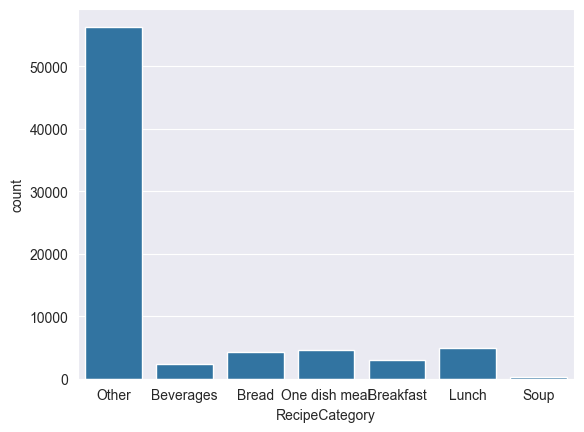

In [51]:
# Descriptives for recipes dataset

print(recipes.describe())

# countplot for RecipeCategory
print(recipes['RecipeCategory'].value_counts())

print(sns.countplot(x='RecipeCategory', data=recipes));

#### Handle name column

In [52]:
# Drop the column for now

recipes = recipes.drop(columns=['Name'])

# TO DO: Do we need the column?

#### Handle CookTime and PrepTime column

In [53]:
# No missing values in both columns

# TO DO: Handle outliers

#### Handle RecipeCategory column

In [54]:
# Dummy encode RecipeCategory column

recipes = pd.get_dummies(recipes, columns=['RecipeCategory'], drop_first=True)

#### Handle RecipeIngredientQuantities and RecipeIngredientParts column

In [55]:
# Just drop the columns for now

recipes = recipes.drop(['RecipeIngredientQuantities', 'RecipeIngredientParts'], axis=1)

# TO DO: Handle them better

#### Handle all nutrition fact columns

In [56]:
# TO DO: Handle potential outliers

#### Handle RecipeServings and RecipeYield column

In [57]:
# Just drop the columns for now

recipes = recipes.drop(['RecipeServings', 'RecipeYield'], axis=1)

# TO DO: Handle missing values, outliers and weird values in RecipeYield

In [58]:
recipes

,RecipeId,CookTime,PrepTime,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeCategory_Bread,RecipeCategory_Breakfast,RecipeCategory_Lunch,RecipeCategory_One dish meal,RecipeCategory_Other,RecipeCategory_Soup
0,73440,0,1800,241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,False,False,False,False,True,False
1,365718,3600,600,370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,False,False,False,False,True,False
2,141757,3600,2700,377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,False,False,False,False,True,False
3,280351,18000,1800,282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,False,False,False,False,True,False
4,180505,3600,1800,257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75599,253577,43200,28800,121.5,0.5,0.1,0.0,1175.1,22.2,7.8,0.6,7.9,False,False,False,False,True,False
75600,267827,3600,2700,652.2,25.8,10.7,197.9,435.5,51.9,7.5,7.2,50.1,False,False,False,False,True,False
75601,266983,1800,900,223.9,9.2,3.6,78.3,725.9,7.3,1.1,1.7,26.7,False,False,False,False,True,False
75602,253739,300,120,2229.8,80.3,69.3,0.0,294.7,369.0,15.7,317.9,26.7,False,False,False,False,True,False


### reviews.csv

#### Overview

In [59]:
# Get overview of the reviews dataset

print(reviews.head())
print(reviews.info())
print(reviews.isnull().sum())

# --> Missing values in columns "Rating", "Like" and "TestSetId"

      AuthorId  RecipeId  Rating Like  TestSetId
0     2492191A     33671     2.0  NaN        1.0
1  2002019979A     92647     2.0  NaN        2.0
2      408594E    161770     NaN  NaN        3.0
3  2001625557E    108231     2.0  NaN        4.0
4  2001427116E     71109     NaN  NaN        5.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AuthorId   140195 non-null  object 
 1   RecipeId   140195 non-null  int64  
 2   Rating     77108 non-null   float64
 3   Like       97381 non-null   object 
 4   TestSetId  42814 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.3+ MB
None
AuthorId         0
RecipeId         0
Rating       63087
Like         42814
TestSetId    97381
dtype: int64


In [60]:
# Descriptives for reviews dataset

print(reviews.describe())

print(reviews['Rating'].value_counts());

print(reviews['Like'].value_counts()); # --> make true = 1 and false = 0

            RecipeId   Rating     TestSetId
count  140195.000000  77108.0  42814.000000
mean   152770.642477      2.0  21407.500000
std    130325.801041      0.0  12359.481549
min        40.000000      2.0      1.000000
25%     47111.000000      2.0  10704.250000
50%    109423.000000      2.0  21407.500000
75%    232075.000000      2.0  32110.750000
max    541195.000000      2.0  42814.000000
Rating
2.0    77108
Name: count, dtype: int64
Like
False    84503
True     12878
Name: count, dtype: int64


#### Split datasets in prediction and use

In [61]:
# Split data into submission that needs to be predicted and the rest we can use

# 1. Get the rows without missing values in "TestSetId" column 
# and missing values in "Like" column

reviews_to_predict = reviews[reviews['TestSetId'].notnull() & reviews['Like'].isnull()]

# 2. Get the rows with missing values in "TestSetId" column

reviews_to_use = reviews[reviews['TestSetId'].isnull()]

In [62]:
reviews_to_use

,AuthorId,RecipeId,Rating,Like,TestSetId
42814,1000036C,320576,NaN,False,NaN
42815,1000216B,189335,NaN,False,NaN
42816,1000221A,133043,2.0,False,NaN
42817,1000221A,90537,2.0,False,NaN
42818,1000221A,334314,2.0,False,NaN
...,...,...,...,...,...
140190,999595E,338070,2.0,False,NaN
140191,999774A,29002,2.0,False,NaN
140192,999774A,159252,NaN,False,NaN
140193,999774A,1171,2.0,True,NaN


#### Remove unneccesary columns

In [63]:
# Remove column "Rating" since it has either no value or only 2.0 -> no information
# Remove column "TestSetId" since only NA values

reviews_to_use = reviews_to_use.drop(['Rating', 'TestSetId'], axis=1)

#### Change type of column Like to binary

In [64]:
# make column "Like" binary, true = 1 and false = 0

reviews_to_use['Like'] = reviews_to_use['Like'].astype('int')

In [65]:
reviews_to_use

,AuthorId,RecipeId,Like
42814,1000036C,320576,0
42815,1000216B,189335,0
42816,1000221A,133043,0
42817,1000221A,90537,0
42818,1000221A,334314,0
...,...,...,...
140190,999595E,338070,0
140191,999774A,29002,0
140192,999774A,159252,0
140193,999774A,1171,1


### requests.csv

#### Overview

In [66]:
# Get overview of the request dataset

print(requests.head())
print(requests.info())
print(requests.isnull().sum())

# --> No missing values

      AuthorId  RecipeId          Time  HighCalories  HighProtein  LowFat  \
0  2001012259B     73440   1799.950949           0.0  Indifferent       0   
1      437641B    365718   4201.820980           0.0          Yes       0   
2  1803340263D    141757   6299.861496           0.0  Indifferent       1   
3      854048B    280351  19801.365796           0.0          Yes       1   
4     2277685E    180505   5400.093457           0.0  Indifferent       0   

      LowSugar  HighFiber  
0            0          0  
1  Indifferent          1  
2  Indifferent          0  
3            0          1  
4            0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AuthorId      140195 non-null  object 
 1   RecipeId      140195 non-null  int64  
 2   Time          140195 non-null  float64
 3   HighCalories  140195 non-null  flo

#### Change types of columns with flags

In [67]:
requests['HighCalories'] = requests['HighCalories'].astype('int')

# In "HighProtein", encode yes = 1 and indifferent = 0
requests['HighProtein'] = requests['HighProtein'].map({'Yes': 1, 'Indifferent': 0})

# In "LowSugar", encode no = 1 and indifferent = 0
requests['LowSugar'] = requests['LowSugar'].map({'0': 1, 'Indifferent': 0})

#### Round time column

In [68]:
# Round time column to integer values and cast to int

requests['Time'] = requests['Time'].round().astype('int')

### Merge datasets

In [69]:
# show the differences in columns "AuthorId / RecipeId" in reviews and requests dataset

#print(set(requests['AuthorId']) - set(reviews_to_use['AuthorId']))
#print(set(requests['RecipeId']) - set(reviews_to_use['RecipeId']))

# -> request has the exact same keys as reviews 
# -> merge on reviews_to_use where matches occur

#### Join requests and reviews_to_use

In [70]:
# Join requests and reviews_to_use on AuthorId and RecipeId

requests_reviews = pd.merge(requests, reviews_to_use, on=['AuthorId', 'RecipeId'])

#### Join requests_reviews and diet

In [71]:
# Join requests_reviews and diet on AuthorId

requests_reviews_diet = pd.merge(requests_reviews, diet, on='AuthorId')

#### Join requests_reviews_diet and recipes

In [72]:
# Join requests_reviews_diet and recipes on RecipeId

requests_reviews_diet_recipes = pd.merge(requests_reviews_diet, recipes, on='RecipeId')

In [73]:
requests_reviews_diet_recipes

,AuthorId,RecipeId,Time,HighCalories,HighProtein,LowFat,LowSugar,HighFiber,Like,Age,...,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeCategory_Bread,RecipeCategory_Breakfast,RecipeCategory_Lunch,RecipeCategory_One dish meal,RecipeCategory_Other,RecipeCategory_Soup
0,2001012259B,73440,1800,0,0,0,1,0,0,46,...,31.8,2.3,1.4,6.7,False,False,False,False,True,False
1,514750D,73440,1801,0,0,0,0,1,0,65,...,31.8,2.3,1.4,6.7,False,False,False,False,True,False
2,1073154D,73440,1800,0,0,1,1,1,0,59,...,31.8,2.3,1.4,6.7,False,False,False,False,True,False
3,2094148C,73440,1800,1,1,1,0,0,0,35,...,31.8,2.3,1.4,6.7,False,False,False,False,True,False
4,2002219246D,73440,1799,0,0,1,1,1,0,40,...,31.8,2.3,1.4,6.7,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97376,45380955C,474766,3900,0,0,0,1,1,1,73,...,43.2,5.2,29.1,7.3,False,False,False,False,True,False
97377,1677720D,253577,71999,0,0,1,0,1,1,27,...,22.2,7.8,0.6,7.9,False,False,False,False,True,False
97378,2000154789A,266983,2701,0,1,0,1,1,1,78,...,7.3,1.1,1.7,26.7,False,False,False,False,True,False
97379,163793B,78171,1561,0,0,0,1,1,1,50,...,92.2,3.9,4.2,21.8,False,False,False,False,True,False


### Logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import balanced_accuracy_score

# Split data into train and test set

#X = requests_reviews_diet_recipes.drop(['AuthorId', 'RecipeId', 'HighCalories', 'HighProtein', 'LowSugar', 'Like'], axis=1)
X = requests_reviews_diet_recipes.drop(['AuthorId', 'RecipeId', 'Like'], axis=1)
y = requests_reviews_diet_recipes['Like']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Fit logistic regression model

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train, y_train)

# Make predictions

predictions = logmodel.predict(X_test)

# Evaluate model

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# Calculate balanced accuracy

print(balanced_accuracy_score(y_test, predictions))

[[25331    12]
 [ 3871     1]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     25343
           1       0.08      0.00      0.00      3872

    accuracy                           0.87     29215
   macro avg       0.47      0.50      0.46     29215
weighted avg       0.76      0.87      0.81     29215

0.4998923804656314


### Random Forest Classifier (RF)

balanced accuracy score
0.66524 RF (n_est.=5)
0.65803 RF (n_est.=25)
0.65552 RF (n_est.=50)
0.64378 RF (n_est.=100)
0.64460 RF (n_est.=200)
0.60007 RF (n_est.=5) & GradientBoosting (n_est.=100) --> not useful


In [92]:
from sklearn.ensemble import RandomForestClassifier

# Split data into train and test set
X = requests_reviews_diet_recipes.drop(['AuthorId', 'RecipeId', 'Like'], axis=1)
y = requests_reviews_diet_recipes['Like']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# Fit Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=5, max_depth=10, random_state=seed)
rf_model.fit(X_train, y_train)

# Make predictions
predictions = rf_model.predict(X_test)

# Evaluate model
print("confusion matrix")
print(confusion_matrix(y_test, predictions))
print("classification report")
print(classification_report(y_test, predictions))

# Calculate balanced accuracy
print("balanced accuracy score")
print(balanced_accuracy_score(y_test, predictions))

confusion matrix
[[25115   228]
 [ 3255   617]]
classification report
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     25343
           1       0.73      0.16      0.26      3872

    accuracy                           0.88     29215
   macro avg       0.81      0.58      0.60     29215
weighted avg       0.86      0.88      0.85     29215

balanced accuracy score
0.5751763032271613


/Users/eliasmac/PycharmProjects/analytics-cup/venv/lib/python3.10/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


[[25343     0]
 [ 3872     0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93     25343
           1       0.00      0.00      0.00      3872

    accuracy                           0.87     29215
   macro avg       0.43      0.50      0.46     29215
weighted avg       0.75      0.87      0.81     29215

Balanced Accuracy: 0.5


/Users/eliasmac/PycharmProjects/analytics-cup/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eliasmac/PycharmProjects/analytics-cup/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/eliasmac/PycharmProjects/analytics-cup/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.